In [1]:
1. Supervised - Regression and Classification
2. Unsupervised

Regression - Dependent variable will be continuous value - bell curve
Classification - Dependent variable will be discrete or binary
A
B

SyntaxError: invalid syntax (3743169540.py, line 1)

In [ ]:
# import os
# os.getcwd()

In [3]:
# import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings


In [4]:
# import dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [9]:
train['data']= 'train'
test['data'] = 'test'

In [10]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train


In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
data             0
dtype: int64

In [12]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,test
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,test


In [13]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
data             0
dtype: int64

In [14]:
all_data = pd.concat([train, test], axis=0)

In [15]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [16]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


In [17]:
all_data.shape

(1309, 13)

In [18]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


# Pre-processing required

In [19]:
# step 1 : check missing data
all_data.isnull().sum() / len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

In [20]:
# Cabin data has 77% missing - so we have to drop this column
all_data = all_data.drop(['Cabin'], axis=1)

In [21]:
all_data.isnull().sum() / len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

In [22]:
all_data.shape

(1309, 12)

In [23]:
all_data['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

<AxesSubplot: ylabel='Age'>

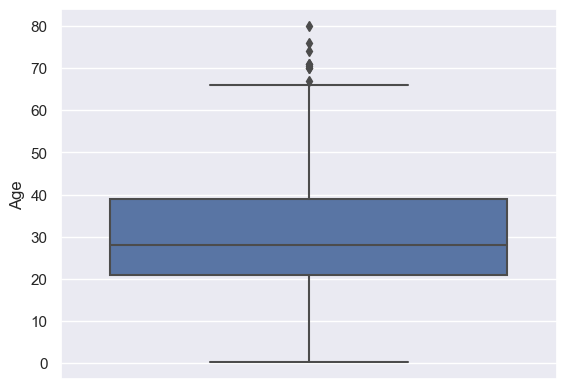

In [24]:
# Age - num
sns.boxplot(y='Age', data=all_data)

In [25]:
all_data['Age'].mean()

29.881137667304014

In [26]:
all_data['Age'].median()

28.0

In [27]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

In [28]:
all_data.isnull().sum() / len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Embarked        0.152788
data            0.000000
dtype: float64

In [29]:
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'data'],
      dtype='object')

In [ ]:
# certain variables are non-significant and hence we have to drop them
# PassengerID, Name, Ticket, Fare

In [30]:
all_data = all_data.drop(['PassengerId','Name','Ticket','Fare'], axis=1)

In [31]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [32]:
all_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [33]:
all_data['Embarked'] = all_data['Embarked'].fillna('S')

In [34]:
all_data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [35]:
549+342

891

In [36]:
train['Survived'].isnull().sum()

0

In [ ]:
# handling missing value is completed

# Encoding required

In [37]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [38]:
all_data = pd.get_dummies(all_data, columns=['Pclass'])

In [39]:
all_data.head()

,Survived,Sex,Age,SibSp,Parch,Embarked,data,Pclass_1,Pclass_2,Pclass_3
0,0.0,male,22.0,1,0,S,train,0,0,1
1,1.0,female,38.0,1,0,C,train,1,0,0
2,1.0,female,26.0,0,0,S,train,0,0,1
3,1.0,female,35.0,1,0,S,train,1,0,0
4,0.0,male,35.0,0,0,S,train,0,0,1


In [40]:
all_data = pd.get_dummies(all_data, columns=['Sex'])

In [41]:
all_data.head()

,Survived,Age,SibSp,Parch,Embarked,data,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0.0,22.0,1,0,S,train,0,0,1,0,1
1,1.0,38.0,1,0,C,train,1,0,0,1,0
2,1.0,26.0,0,0,S,train,0,0,1,1,0
3,1.0,35.0,1,0,S,train,1,0,0,1,0
4,0.0,35.0,0,0,S,train,0,0,1,0,1


In [42]:
all_data = pd.get_dummies(all_data, columns=['Embarked'])

In [43]:
all_data.head()

,Survived,Age,SibSp,Parch,data,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,0,0,1,0,1,0,0,1
1,1.0,38.0,1,0,train,1,0,0,1,0,1,0,0
2,1.0,26.0,0,0,train,0,0,1,1,0,0,0,1
3,1.0,35.0,1,0,train,1,0,0,1,0,0,0,1
4,0.0,35.0,0,0,train,0,0,1,0,1,0,0,1


In [44]:
# Dummy variable (n-1)
all_data = all_data.drop(['Pclass_1','Sex_female','Embarked_C'], axis=1)

In [45]:
all_data.head()

,Survived,Age,SibSp,Parch,data,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,train,0,1,1,0,1
1,1.0,38.0,1,0,train,0,0,0,0,0
2,1.0,26.0,0,0,train,0,1,0,0,1
3,1.0,35.0,1,0,train,0,0,0,0,1
4,0.0,35.0,0,0,train,0,1,1,0,1


In [46]:
all_data['Parch'].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

<AxesSubplot: ylabel='SibSp'>

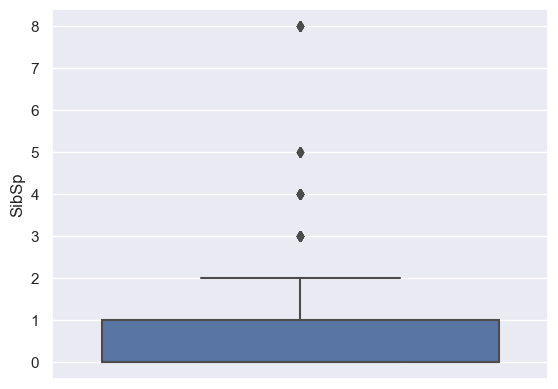

In [47]:
sns.boxplot(y='SibSp', data=all_data)

In [ ]:
# Outlier treatement - there is no outlier found in the dataset (Age range is correct)
# since, it's logistic regression, hence there is no need to handle outlier

In [ ]:
# Part 4 - feature scaling - hold it, if your accuracy is not good, then we have to do feature scaling as well

In [48]:
train.duplicated().sum()

0

In [49]:
test.duplicated().sum()

0

In [50]:
# Segregate train and test 
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [51]:
train.shape

(891, 10)

In [52]:
test.shape

(418, 10)

In [53]:
train = train.drop(['data'], axis=1)
test = test.drop(['data'], axis=1)

In [54]:
train.head()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0.0,22.0,1,0,0,1,1,0,1
1,1.0,38.0,1,0,0,0,0,0,0
2,1.0,26.0,0,0,0,1,0,0,1
3,1.0,35.0,1,0,0,0,0,0,1
4,0.0,35.0,0,0,0,1,1,0,1


In [55]:
# split the data into independent and dependent variable 
x = train.drop(['Survived'], axis=1)
y = train['Survived']

In [56]:
x.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,22.0,1,0,0,1,1,0,1
1,38.0,1,0,0,0,0,0,0
2,26.0,0,0,0,1,0,0,1
3,35.0,1,0,0,0,0,0,1
4,35.0,0,0,0,1,1,0,1


In [57]:
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

In [ ]:
test.head()

In [58]:
x1 = test.drop(['Survived'], axis=1)
y1 = test['Survived']

In [59]:
x1.head()

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,34.5,0,0,0,1,1,1,0
1,47.0,1,0,0,1,0,0,1
2,62.0,0,0,1,0,1,1,0
3,27.0,0,0,0,1,1,0,1
4,22.0,1,1,0,1,0,0,1


In [60]:
y1.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Survived, dtype: float64

In [61]:
# Last preprocessing part - Imbalance data check
# it's balance dataset
y.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [ ]:
### This is all about preprocessing part

# Exploratory Data Analysis - EDA

In [65]:
for i in all_data.columns:
    print("****************************************************", i , 
          "*****************************************************************")
    print()
    print(set(all_data[i].tolist()))
    print()
    

**************************************************** Survived *****************************************************************

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

C:\Users\preet\AppData\Local\Temp\ipykernel_20624\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


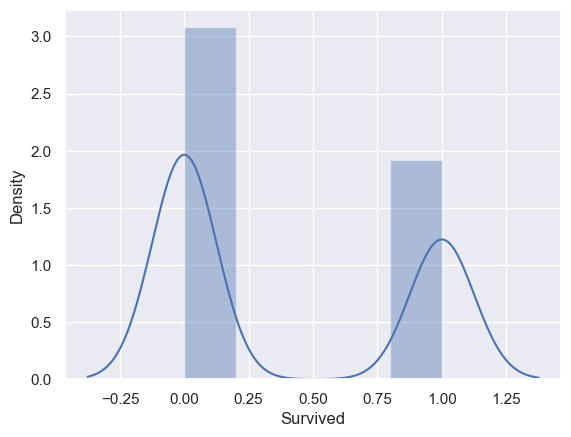

C:\Users\preet\AppData\Local\Temp\ipykernel_20624\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


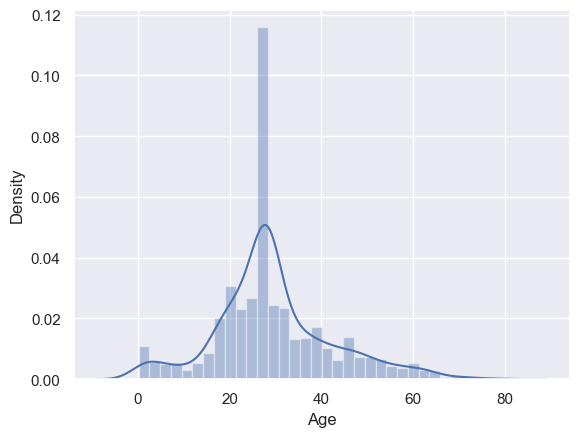

C:\Users\preet\AppData\Local\Temp\ipykernel_20624\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


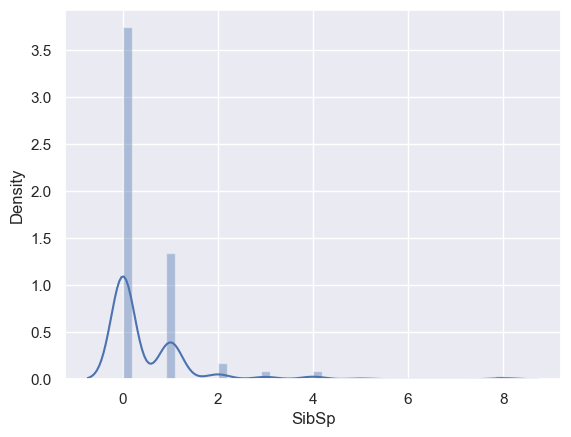

C:\Users\preet\AppData\Local\Temp\ipykernel_20624\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


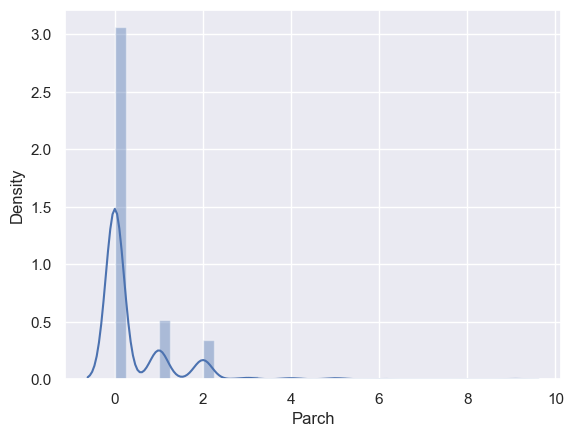

C:\Users\preet\AppData\Local\Temp\ipykernel_20624\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


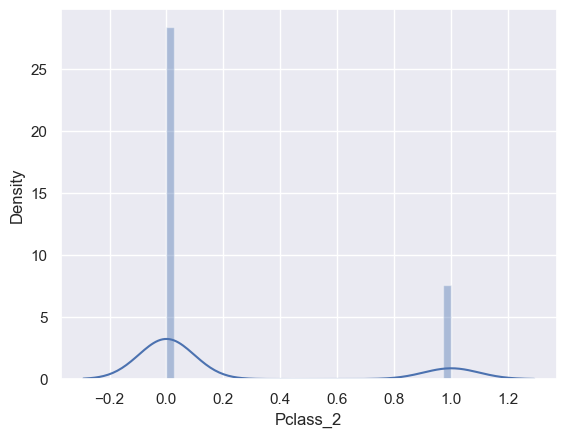

C:\Users\preet\AppData\Local\Temp\ipykernel_20624\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


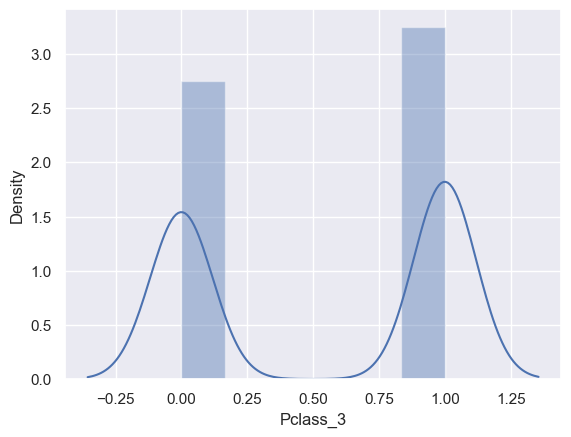

C:\Users\preet\AppData\Local\Temp\ipykernel_20624\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


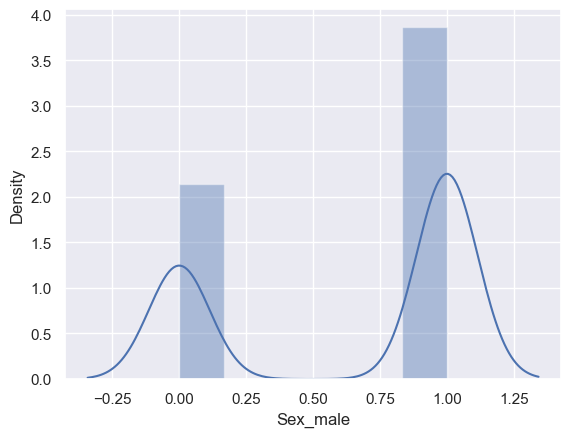

C:\Users\preet\AppData\Local\Temp\ipykernel_20624\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


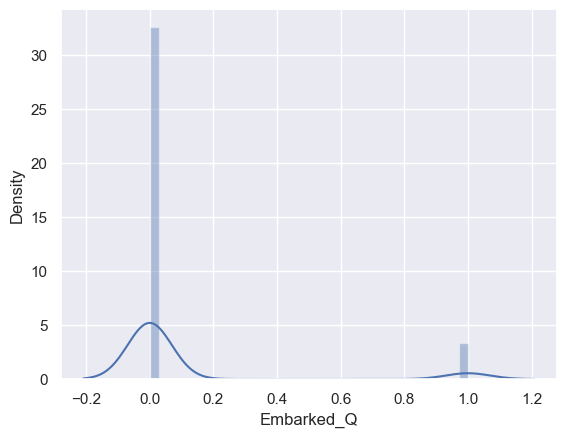

C:\Users\preet\AppData\Local\Temp\ipykernel_20624\4136829389.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[col])


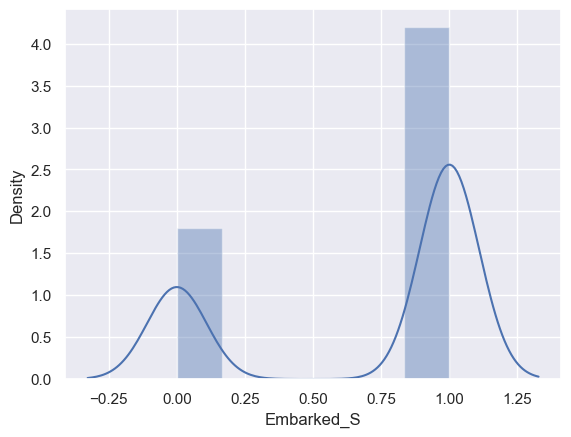

In [66]:
def distplots(col):
    sns.distplot(all_data[col])
    plt.show()
    
for i in list(all_data.select_dtypes(exclude=['object']).columns):
    distplots(i)

C:\Users\preet\AppData\Local\Temp\ipykernel_20624\3663493398.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(all_data.corr(), annot=True, cmap='PiYG')


<AxesSubplot: >

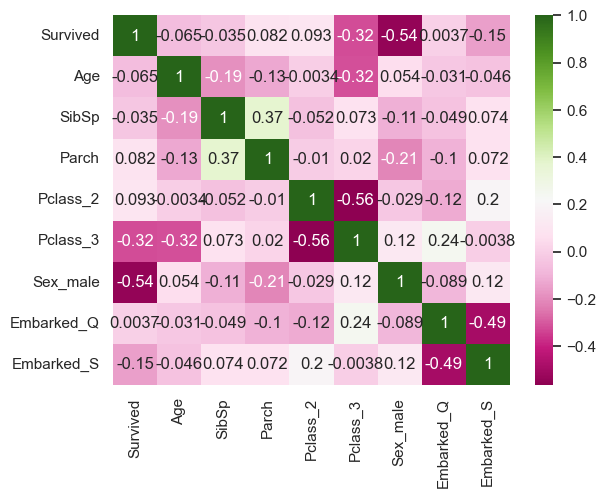

In [73]:
sns.heatmap(all_data.corr(), annot=True, cmap='PiYG')

In [67]:
all_data.corr()

C:\Users\preet\AppData\Local\Temp\ipykernel_20624\2125457306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  all_data.corr()


,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.064910,-0.035322,0.081629,0.093349,-0.322308,-0.543351,0.003650,-0.149683
Age,-0.064910,1.000000,-0.189972,-0.125851,-0.003354,-0.316233,0.053663,-0.031132,-0.046404
SibSp,-0.035322,-0.189972,1.000000,0.373587,-0.052419,0.072610,-0.109609,-0.048678,0.073709
Parch,0.081629,-0.125851,0.373587,1.000000,-0.010057,0.019521,-0.213125,-0.100943,0.071881
Pclass_2,0.093349,-0.003354,-0.052419,-0.010057,1.000000,-0.563180,-0.028862,-0.121973,0.196532
Pclass_3,-0.322308,-0.316233,0.072610,0.019521,-0.563180,1.000000,0.116562,0.243706,-0.003805
Sex_male,-0.543351,0.053663,-0.109609,-0.213125,-0.028862,0.116562,1.000000,-0.088651,0.115193
Embarked_Q,0.003650,-0.031132,-0.048678,-0.100943,-0.121973,0.243706,-0.088651,1.000000,-0.491656
Embarked_S,-0.149683,-0.046404,0.073709,0.071881,0.196532,-0.003805,0.115193,-0.491656,1.000000


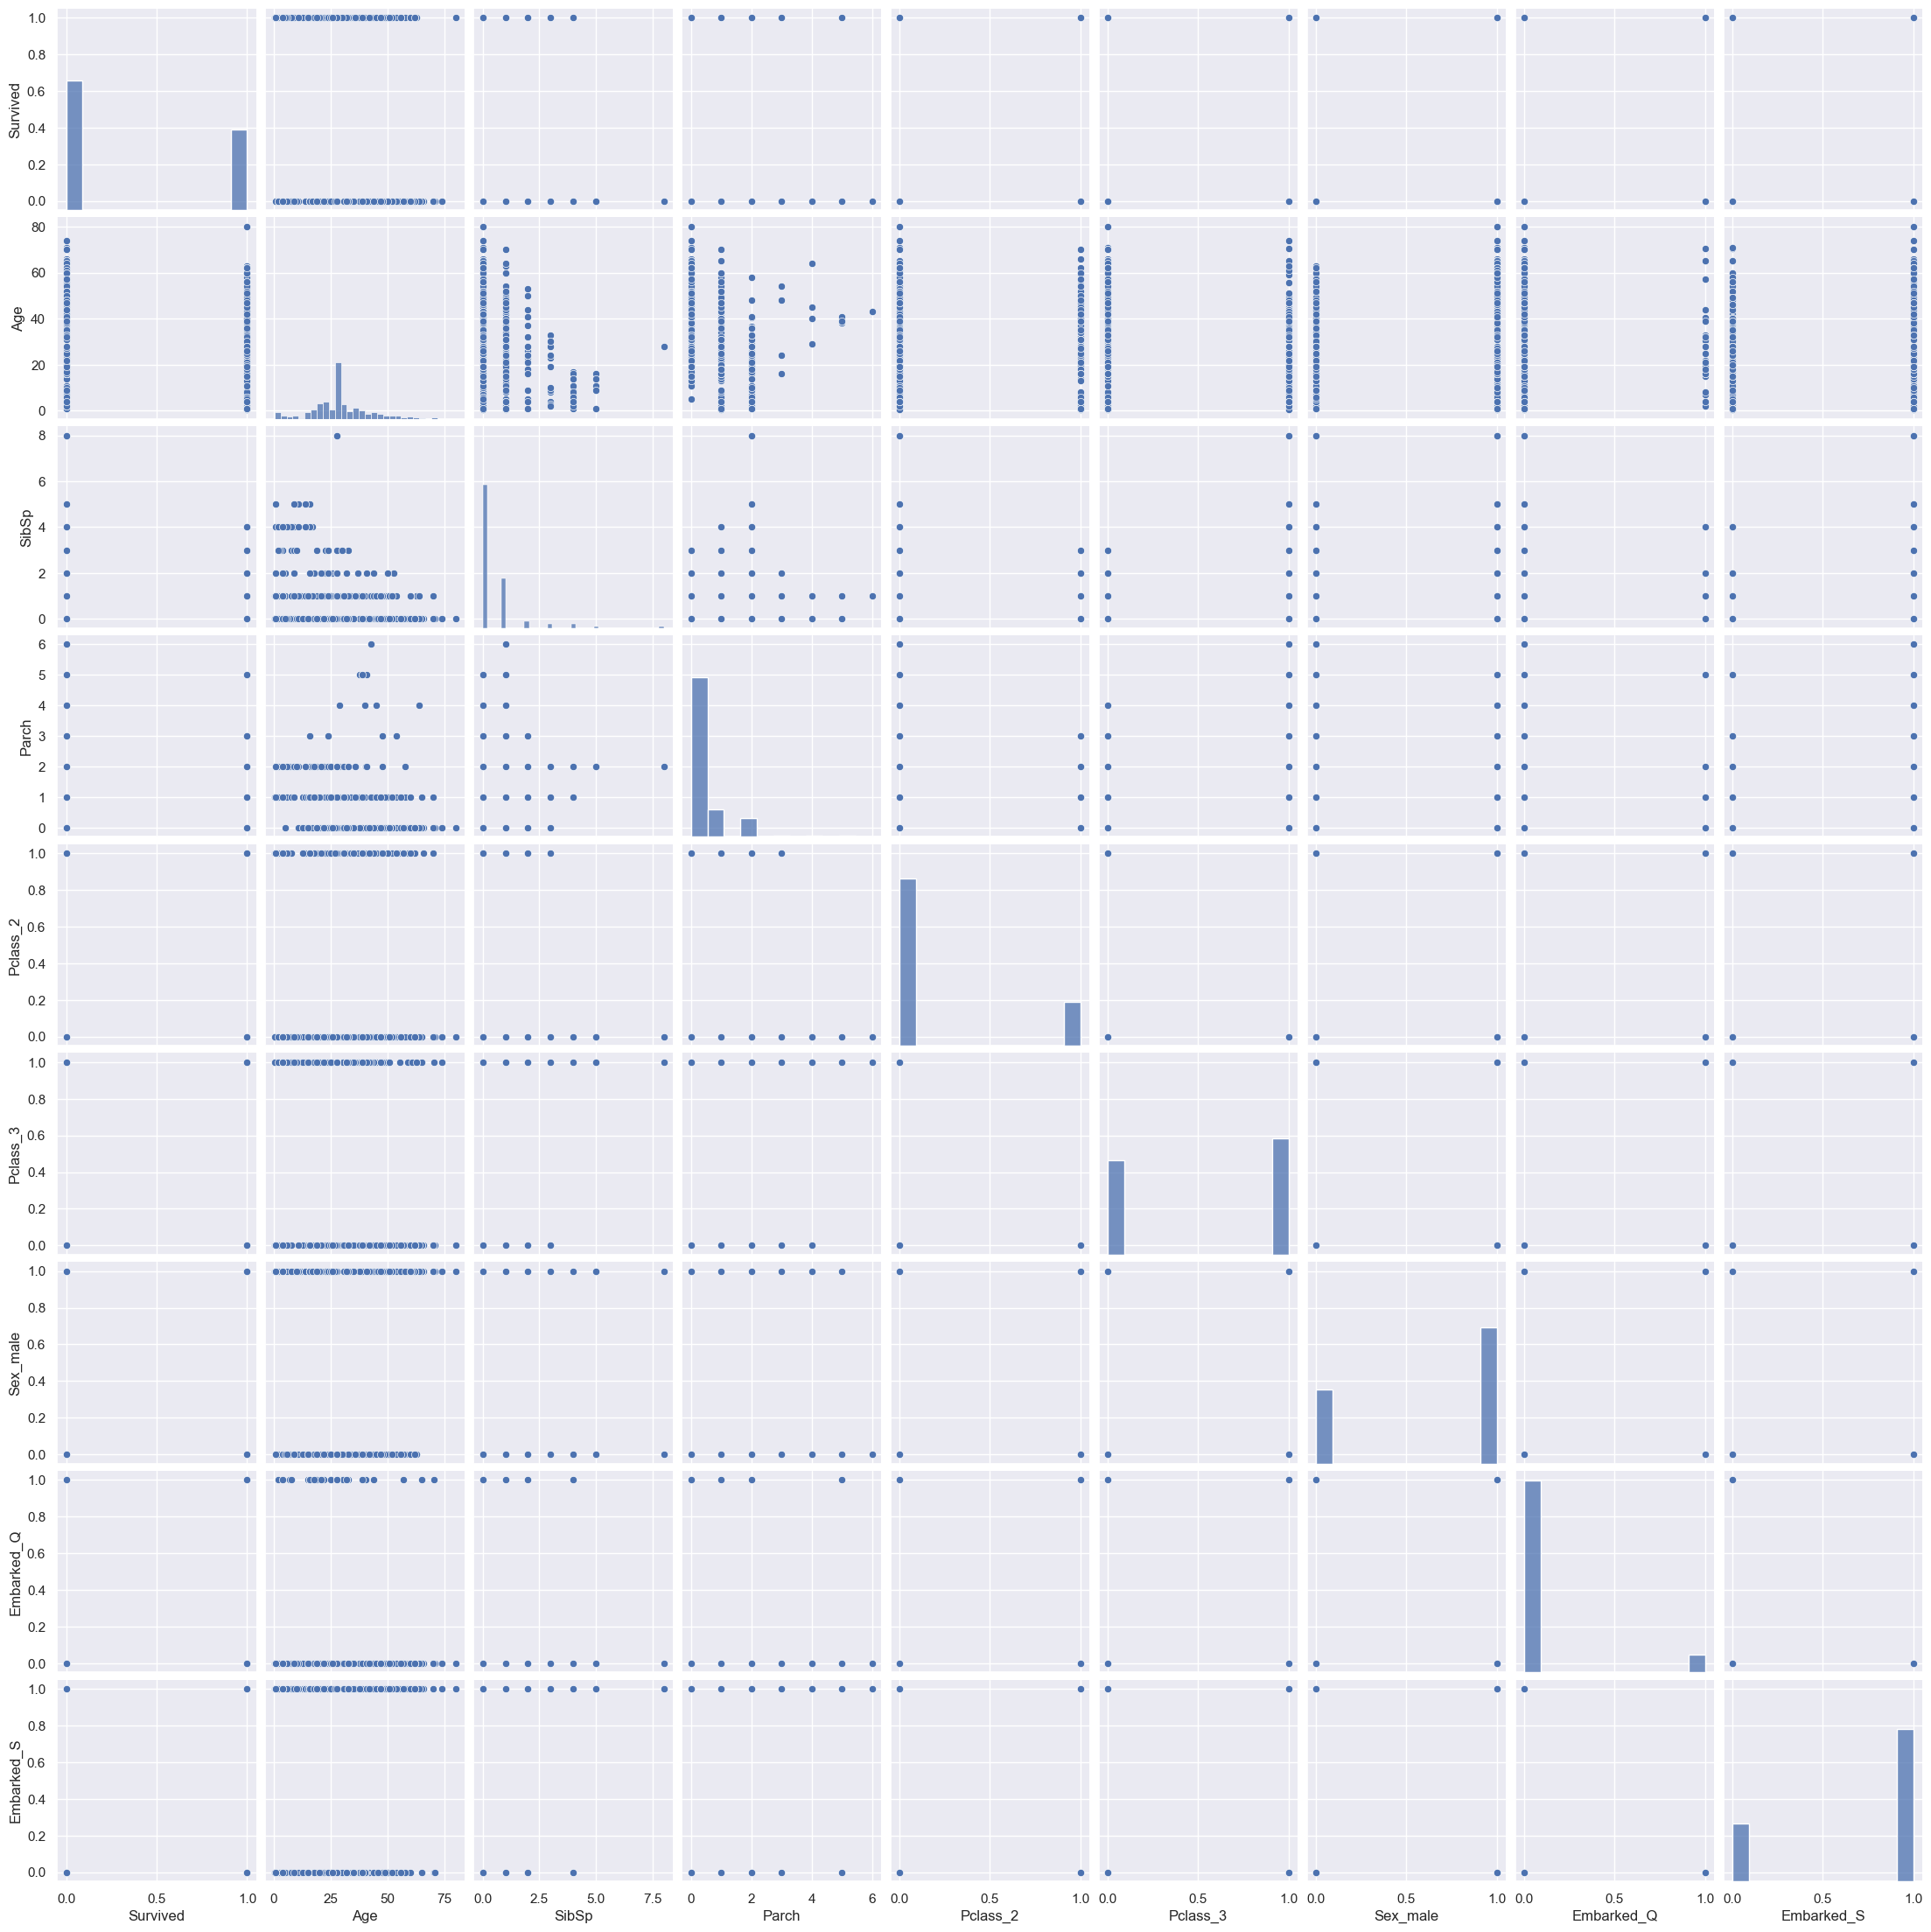

In [74]:
sns.pairplot(train)

In [ ]:
y

In [78]:
# Split the data into training and test
# Training for building a model and test for predicting the model performance
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [79]:
x_test

,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
590,35.0,0,0,0,1,1,0,1
131,20.0,0,0,0,1,1,0,1
628,26.0,0,0,0,1,1,0,1
195,58.0,0,0,0,0,0,0,0
230,35.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
456,65.0,0,0,0,0,1,0,1
191,19.0,0,0,1,0,1,0,1
603,44.0,0,0,0,1,1,0,1
94,59.0,0,0,0,1,1,0,1


In [80]:
y_test

590    0.0
131    0.0
628    0.0
195    1.0
230    1.0
      ... 
456    0.0
191    0.0
603    0.0
94     0.0
766    0.0
Name: Survived, Length: 179, dtype: float64

In [81]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


# Building Logistic Regression Model 

In [82]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)

C:\Users\preet\anaconda3\envs\newpython\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
# Predict result
logit_model.fit(x_train, y_train)
y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

C:\Users\preet\anaconda3\envs\newpython\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_test

In [84]:
y_pred_test

array([0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1.])

# Evaluate the model result

In [85]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [86]:
print("Confusion Matrix")
confusion_matrix(y_test, y_pred_test)

Confusion Matrix


array([[102,  15],
       [ 17,  45]], dtype=int64)

In [87]:
print("Confusion Matrix")
c = confusion_matrix(y_test, y_pred_test)
print(c)
print('\n')
print("classification_report")
d = classification_report(y_test, y_pred_test)
print(d)
print('\n')
print("Training Accuracy", accuracy_score(y_train, y_pred_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_test))

Confusion Matrix
[[102  15]
 [ 17  45]]


classification_report
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.86       117
         1.0       0.75      0.73      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



Training Accuracy 0.8103932584269663
********************************************************************************
Test Accuracy 0.8212290502793296


In [88]:
# print("Training Accuracy", accuracy_score(y_train, y_pred_train))
# print("****************"*5)
# print("Test Accuracy", accuracy_score(y_test, y_pred_test))

Training Accuracy 0.8103932584269663
********************************************************************************
Test Accuracy 0.8212290502793296


In [ ]:
# how to improve my model
# cross validation score - K_FOLD method
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(logit_model, x_test, y_test, cv =20)
accuracy

In [ ]:
print("Avg Accuracy after doing 20 split", accuracy.mean())
print("*******************")
print("Best Accuracy", accuracy[2])

# ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test, y_pred_test)
logistic_roc_auc

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label = "ROC Curve (area=%0.2f)" %logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic with Area Under Curve")
plt.legend(loc='lower right')
plt.show()

In [ ]:
x1.head()

In [ ]:
y1

In [ ]:
# Last part, we have to predict test data (whether customer will survived or not) where we don't have dv 
final_result = logit_model.predict(x1)

In [ ]:
final_result

In [ ]:
final_report = pd.concat([x1, pd.DataFrame(final_result)], axis=1)

In [ ]:
final_report

# Decision Tree Classifier Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Criterion = Gini
dtree = DecisionTreeClassifier(criterion='gini')
dtree.fit(x_train, y_train)

In [ ]:
y_pred_dt_train = dtree.predict(x_train)
y_pred_dt_test = dtree.predict(x_test)

In [ ]:
print("Training Accuracy", accuracy_score(y_train, y_pred_dt_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_dt_test))

In [ ]:
# Criterion = 'entropy'
dtree1 = DecisionTreeClassifier(criterion='entropy')
dtree1.fit(x_train, y_train)

In [ ]:
y_pred_dt1_train = dtree1.predict(x_train)
y_pred_dt1_test = dtree1.predict(x_test)

In [ ]:
print("Training Accuracy", accuracy_score(y_train, y_pred_dt1_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_dt1_test))

# Visualization

In [ ]:
from sklearn import tree

In [ ]:
tree.plot_tree(dtree1, filled=True)
plt.show()

# RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,criterion='entropy', 
                            random_state=111)
rf.fit(x_train, y_train)

In [ ]:
y_pred_rf_train = rf.predict(x_train)
y_pred_rf_test = rf.predict(x_test)

In [ ]:
print("Training Accuracy", accuracy_score(y_train, y_pred_rf_train))
print("****************"*5)
print("Test Accuracy", accuracy_score(y_test, y_pred_rf_test))

In [ ]:
# how to improve my model
# cross validation score - K_FOLD method
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(rf, x_test, y_test, cv =10)
accuracy

In [ ]:
accuracy[-1]

In [ ]:
accuracy.mean()

# Home work - https://www.kaggle.com/competitions/spaceship-titanic/data